# **Regression Project: Predicting House Price in Bangalore**

# **Importing Important Liabraries**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Importing csv File**

In [32]:
data_set= pd.read_csv('/content/Bengaluru_House_Data.csv')
data_set.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,16-Jan,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,17-Jan,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,18-Jan,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,18-Jan,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,18-Jan,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# **Analysing the DataFrame**

In [33]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [34]:
data_set.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [35]:
data_set.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


# **Data Cleaning or missing value treatment:**

In [36]:
data_set = data_set.drop(["society"], axis = 1)

In [37]:
data_set['balcony'].fillna(data_set['balcony'].mode(), inplace=True)

In [38]:
data_set['bath'].fillna(data_set['bath'].mode(), inplace=True)

In [39]:
data_set['size'].fillna(data_set['size'].mode(), inplace=True)

In [40]:
data_set.dropna(axis = 0, inplace = True)

In [41]:
data_set.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

# **Data Manipulation & Explratory Data Analysis**

In [42]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12710 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12710 non-null  object 
 1   availability  12710 non-null  object 
 2   location      12710 non-null  object 
 3   size          12710 non-null  object 
 4   total_sqft    12710 non-null  object 
 5   bath          12710 non-null  float64
 6   balcony       12710 non-null  float64
 7   price         12710 non-null  float64
dtypes: float64(3), object(5)
memory usage: 893.7+ KB


In [43]:
data_set.nunique()

area_type          4
availability      81
location        1265
size              27
total_sqft      1976
bath              16
balcony            4
price           1924
dtype: int64

In [44]:
for column in data_set.columns[0:]:
    print(column,": ",data_set[column].unique())

area_type :  ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
availability :  ['16-Jan' '17-Jan' '18-Jan' '19-Jan' '20-Jan' '21-Jan' '22-Jan' '17-Feb'
 '18-Feb' '19-Feb' '20-Feb' '21-Feb' '16-Mar' '17-Mar' '18-Mar' '19-Mar'
 '20-Mar' '21-Mar' '22-Mar' '17-Apr' '18-Apr' '19-Apr' '20-Apr' '17-May'
 '18-May' '19-May' '20-May' '21-May' '22-May' '15-Jun' '17-Jun' '18-Jun'
 '19-Jun' '20-Jun' '21-Jun' '22-Jun' '14-Jul' '16-Jul' '17-Jul' '18-Jul'
 '19-Jul' '20-Jul' '21-Jul' '15-Aug' '17-Aug' '18-Aug' '19-Aug' '20-Aug'
 '21-Aug' '16-Sep' '17-Sep' '18-Sep' '19-Sep' '20-Sep' '21-Sep' '15-Oct'
 '16-Oct' '17-Oct' '18-Oct' '19-Oct' '20-Oct' '21-Oct' '14-Nov' '15-Nov'
 '16-Nov' '17-Nov' '18-Nov' '19-Nov' '20-Nov' '21-Nov' '22-Nov' '15-Dec'
 '16-Dec' '17-Dec' '18-Dec' '19-Dec' '20-Dec' '21-Dec' '22-Dec'
 'Immediate Possession' 'Ready To Move']
location :  ['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur ex

In [45]:
data_set['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [46]:
data_set['size']= data_set['size'].apply(lambda x :float(x.split(' ')[0]))

In [47]:
data_set['size'].unique()

array([ 2.,  4.,  3.,  1.,  6.,  8.,  7.,  5., 11.,  9., 27., 43., 14.,
       12., 10., 13.])

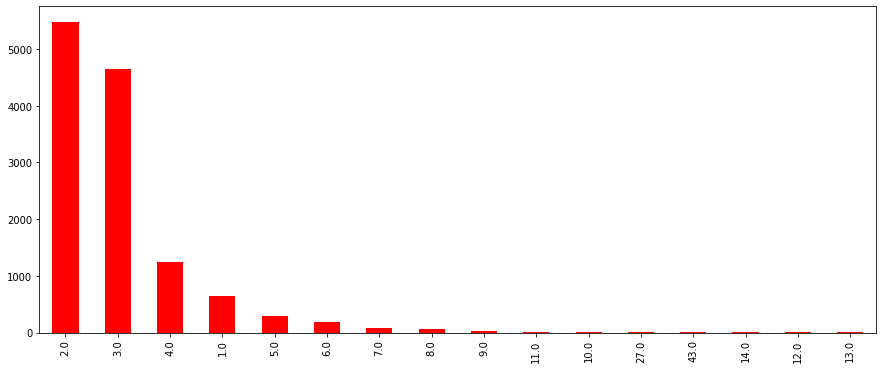

In [48]:
plt.figure(figsize=(15,6))
data_set['size'].value_counts().plot(kind = 'bar',color = 'r')
plt.show()


In [49]:
data_set['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [50]:
def sqft(x):
     temp = x.split('-')
     if len(temp)==2:
        return (float(temp[0]) + float(temp[1]))/2
     try:
        return float(x)
     except :
        return None

In [51]:
data_set["total_sqft"] = data_set["total_sqft"].apply(sqft)

In [52]:
data_set=data_set.dropna()

 ***The formula for calculating price per square foot at the most basic level: Take the home’s price and divide it by the home’s square footage. The price per square foot tends to be higher for smaller houses, and lower for larger houses.***

In [53]:

data_set['price_per_sqft'] = data_set['price']*1000000/data_set['total_sqft']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
data_set

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,16-Jan,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,36998.106061
1,Plot Area,17-Jan,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00,46153.846154
2,Built-up Area,18-Jan,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,43055.555556
3,Super built-up Area,18-Jan,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,62458.908613
4,Super built-up Area,18-Jan,Kothanur,2.0,1200.0,2.0,1.0,51.00,42500.000000
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3.0,1715.0,3.0,3.0,112.00,65306.122449
13315,Built-up Area,Ready To Move,Whitefield,5.0,3453.0,4.0,0.0,231.00,66898.349262
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2.0,1141.0,2.0,1.0,60.00,52585.451358
13318,Super built-up Area,Ready To Move,Padmanabhanagar,4.0,4689.0,4.0,1.0,488.00,104073.363190


In [55]:
data_set.describe()

,size,total_sqft,bath,balcony,price,price_per_sqft
count,12668.000000,12668.000000,12668.000000,12668.000000,12668.000000,1.266800e+04
mean,2.736422,1511.835167,2.616277,1.585649,105.952648,6.876277e+04
std,1.202643,1162.097276,1.223882,0.816758,131.813137,2.263354e+05
min,1.000000,5.000000,1.000000,0.000000,8.000000,2.678298e+03
25%,2.000000,1100.000000,2.000000,1.000000,49.015000,4.242721e+04
50%,3.000000,1260.000000,2.000000,2.000000,70.000000,5.376344e+04
75%,3.000000,1640.000000,3.000000,2.000000,115.000000,7.142857e+04
max,43.000000,52272.000000,40.000000,3.000000,2912.000000,2.300000e+07


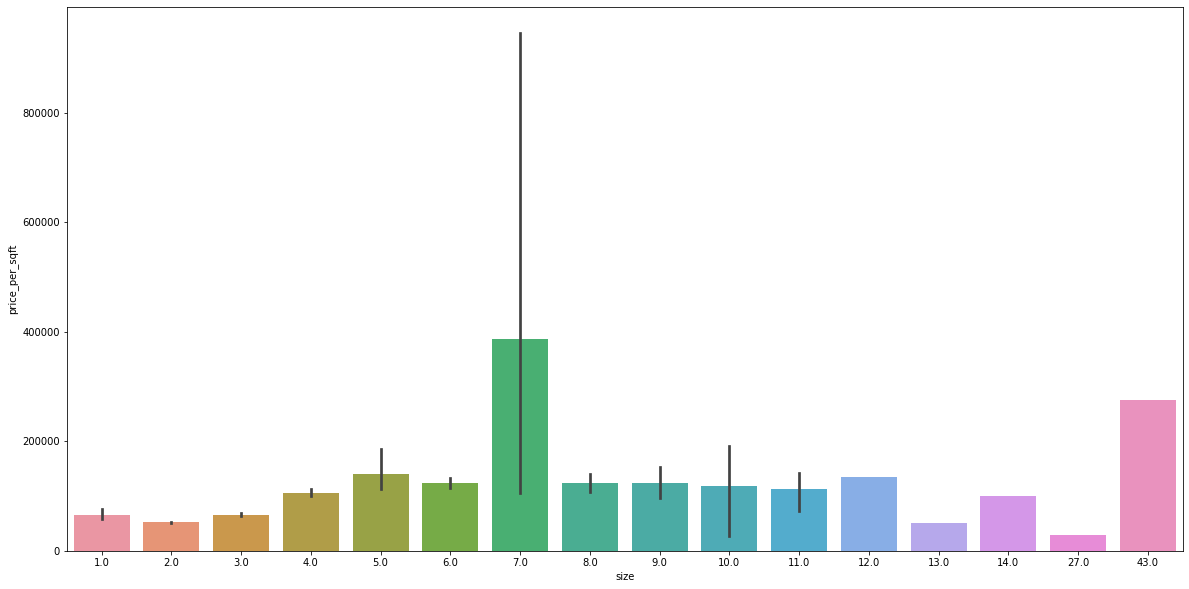

In [56]:
plt.figure(figsize=(20,10))
sns.barplot(x='size', y = 'price_per_sqft',data = data_set)

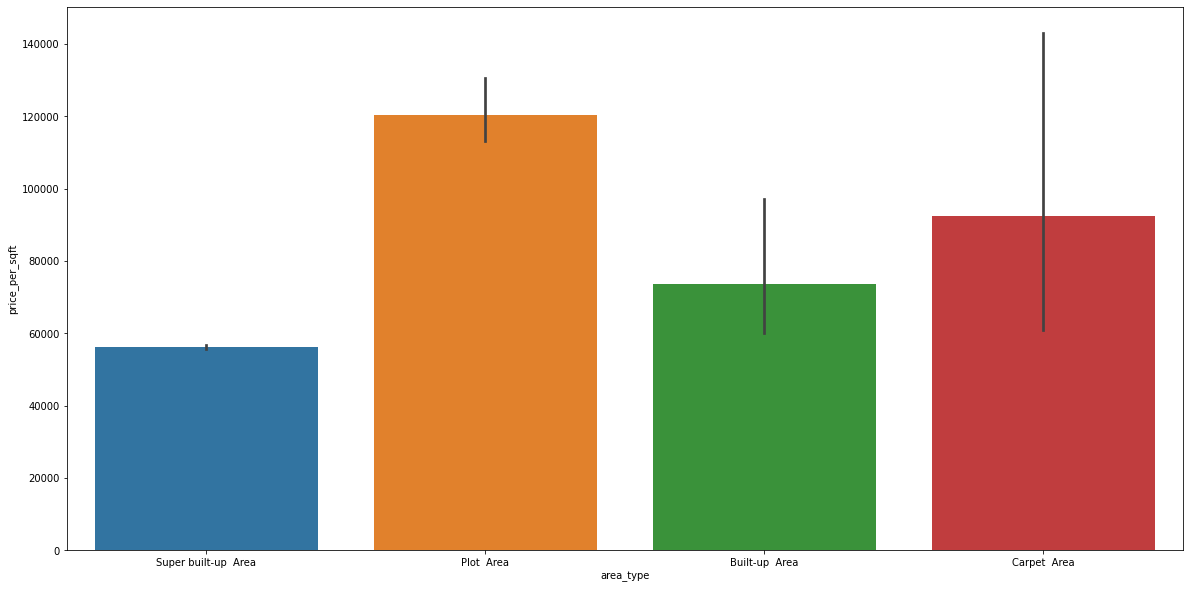

In [57]:
plt.figure(figsize=(20,10))
sns.barplot(x='area_type', y ='price_per_sqft',data = data_set)

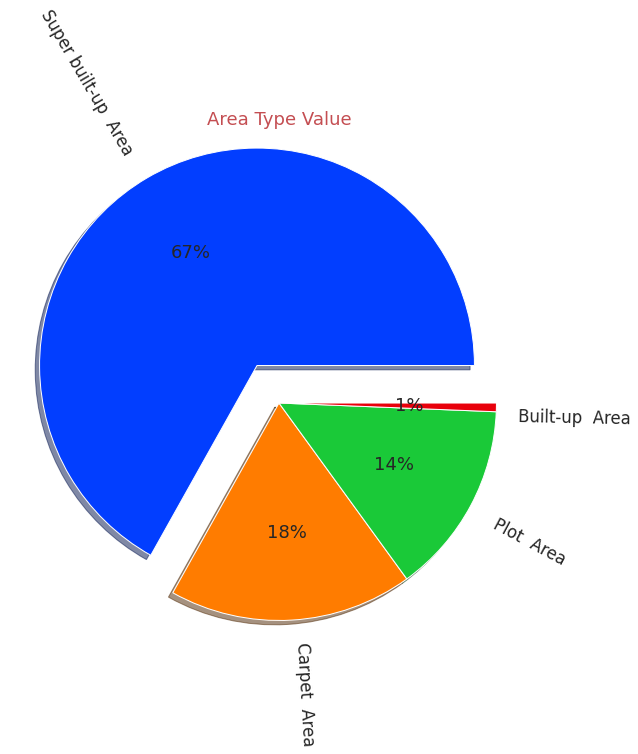

In [58]:
plt.figure(figsize=(15,10))

# Seaborn color palette to plot pie chart
colors = sns.color_palette('bright')
explode = [0.2, 0, 0, 0]
label=['Super built-up  Area','Carpet  Area','Plot  Area','Built-up  Area']
sns.set(font_scale=1.5)

# create pie chart using matplotlib
plt.pie(data_set['area_type'].value_counts(), labels=label, colors=colors,
        autopct='%0.0f%%',explode=explode,shadow=True, rotatelabels=True)
plt.title('Area Type Value',color='r')
plt.show()


In [59]:
data_set['bath'].value_counts()

2.0     6820
3.0     3134
4.0     1105
1.0      779
5.0      428
6.0      240
7.0       82
8.0       42
9.0       26
10.0       6
27.0       1
11.0       1
12.0       1
40.0       1
15.0       1
13.0       1
Name: bath, dtype: int64

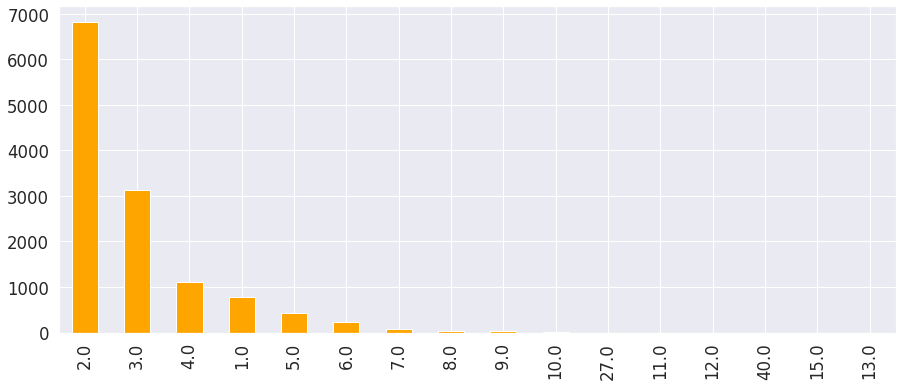

In [60]:
plt.figure(figsize=(15,6))
data_set['bath'].value_counts().plot(kind = 'bar',color = 'orange')
plt.show()

In [61]:
data_set['location'] = data_set['location'].apply(lambda x : x.strip())
location_count = data_set['location'].value_counts()

In [62]:
location_count

Whitefield           514
Sarjapur  Road       372
Electronic City      302
Kanakpura Road       259
Thanisandra          233
                    ... 
Subbannaiah Palya      1
whitefiled             1
Medi Agrahara          1
Sadduguntepalya        1
Abshot Layout          1
Name: location, Length: 1248, dtype: int64

In [63]:
locationlessthan10=location_count[location_count<=10]
locationlessthan10

1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Nagappa Reddy Layout     10
Dairy Circle             10
                         ..
Subbannaiah Palya         1
whitefiled                1
Medi Agrahara             1
Sadduguntepalya           1
Abshot Layout             1
Name: location, Length: 1013, dtype: int64

In [64]:
len(data_set.location.unique())

1248

In [65]:
data_set.location=data_set.location.apply(lambda x: 'other' if x in locationlessthan10 else x)
len(data_set.location.unique())

236

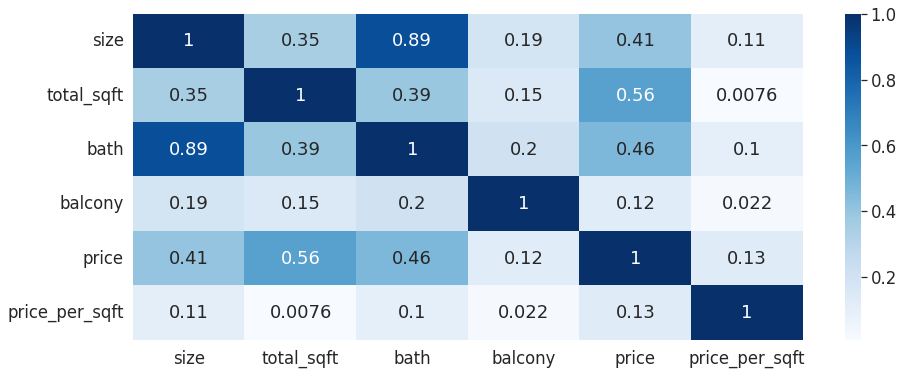

In [66]:
plt.figure(figsize=(15,6))
sns.heatmap(data_set.corr(),cmap='Blues',annot=True)

In [67]:
data_set.corr()['price']

size              0.406645
total_sqft        0.558555
bath              0.459320
balcony           0.120407
price             1.000000
price_per_sqft    0.126068
Name: price, dtype: float64

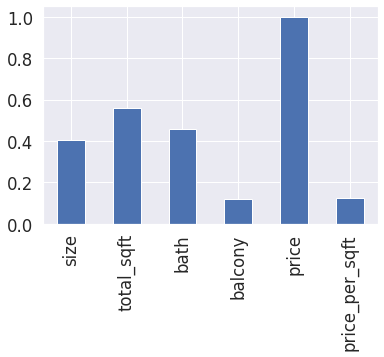

In [68]:
data_set.corr()['price'].plot(kind = 'bar')
plt.show()

In [69]:
data_set.columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath',
       'balcony', 'price', 'price_per_sqft'],
      dtype='object')

# **Detecting and Removal of outliers**

In [70]:
df=data_set.copy()
df.drop([ 'availability','price_per_sqft' ,'balcony'],axis=1,inplace=True)


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12668 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   12668 non-null  object 
 1   location    12668 non-null  object 
 2   size        12668 non-null  float64
 3   total_sqft  12668 non-null  float64
 4   bath        12668 non-null  float64
 5   price       12668 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.2+ MB


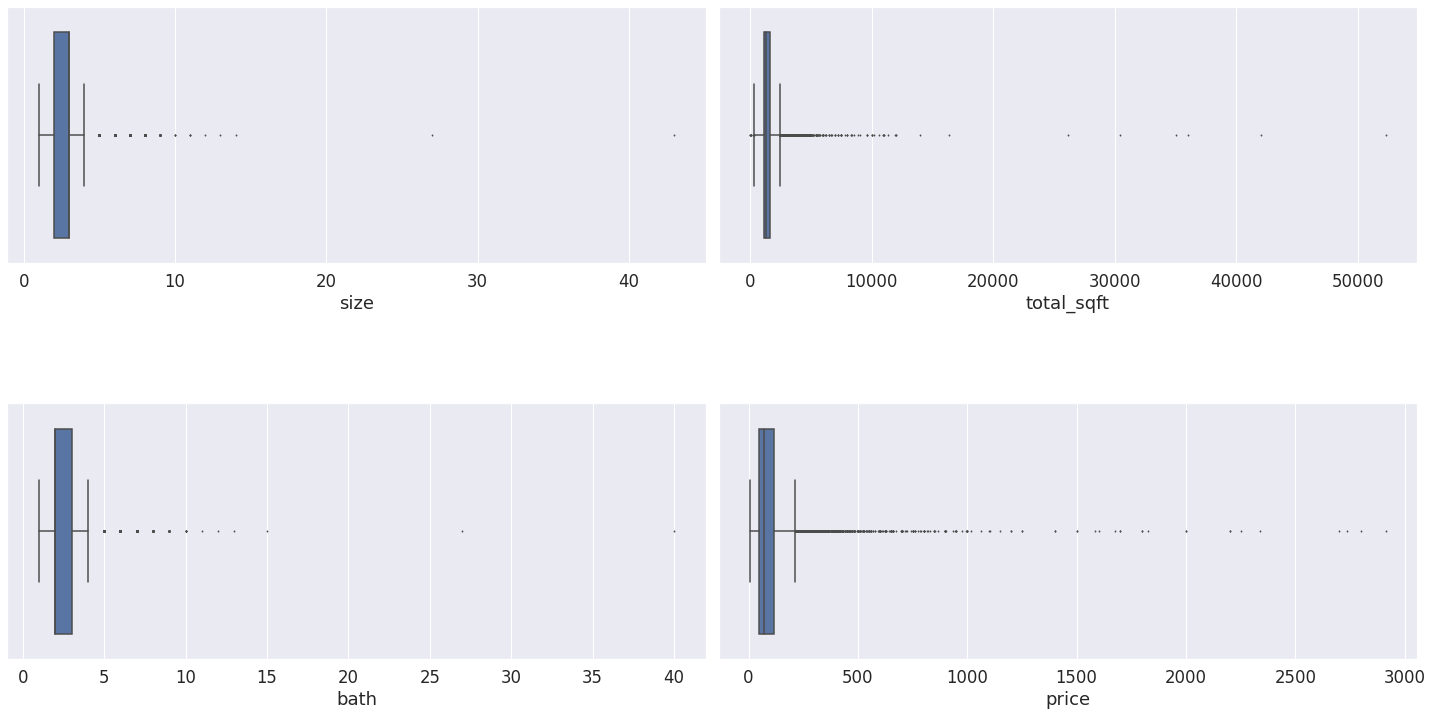

In [72]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()
for i in ['size','total_sqft','bath','price']:

      sns.boxplot(x= i,data=df,ax=ax[index],fliersize=True)
      index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [73]:
df[(df.total_sqft/df.size<300)].head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2.0,1056.0,2.0,39.07
1,Plot Area,Chikka Tirupathi,4.0,2600.0,5.0,120.00
2,Built-up Area,Uttarahalli,3.0,1440.0,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3.0,1521.0,3.0,95.00
4,Super built-up Area,Kothanur,2.0,1200.0,2.0,51.00


In [74]:
df['size'].unique()

array([ 2.,  4.,  3.,  1.,  6.,  8.,  7.,  5., 11.,  9., 27., 43., 14.,
       12., 10., 13.])

In [75]:
df[df['size']>20]

,area_type,location,size,total_sqft,bath,price
1718,Super built-up Area,other,27.0,8000.0,27.0,230.0
4684,Plot Area,Munnekollal,43.0,2400.0,40.0,660.0


In [ ]:
#df=df.drop(size_drop)

In [76]:
df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  7.,  6.,  9., 27., 11., 12., 10.,
       40., 15., 13.])

In [77]:
df[df['bath']>10]

,area_type,location,size,total_sqft,bath,price
1718,Super built-up Area,other,27.0,8000.0,27.0,230.0
1768,Plot Area,other,11.0,1200.0,11.0,170.0
1979,Plot Area,other,8.0,990.0,12.0,120.0
4684,Plot Area,Munnekollal,43.0,2400.0,40.0,660.0
4916,Super built-up Area,other,14.0,1250.0,15.0,125.0
9935,Super built-up Area,other,13.0,5425.0,13.0,275.0


In [ ]:
#df=df.drop(bath_drop)

In [78]:
df['total_sqft'].values

array([1056., 2600., 1440., ..., 1141., 4689.,  550.])

In [79]:
#calculate interquartile range 
q3, q1 = np.percentile(df['total_sqft'], [75 ,25])
iqr = q3 - q1
upper=q3 +1.5*(iqr)
lower=q1 -1.5*(iqr)
print(upper,lower)

2450.0 290.0


In [80]:
df[(df['total_sqft']<300) | (df['total_sqft']>2500)]

,area_type,location,size,total_sqft,bath,price
1,Plot Area,Chikka Tirupathi,4.0,2600.0,5.0,120.0
11,Plot Area,Whitefield,4.0,2785.0,5.0,295.0
18,Super built-up Area,other,3.0,2770.0,4.0,290.0
22,Plot Area,Thanisandra,4.0,2800.0,5.0,380.0
60,Plot Area,other,3.0,4395.0,3.0,240.0
...,...,...,...,...,...,...
13268,Super built-up Area,EPIP Zone,4.0,3360.0,5.0,221.0
13290,Super built-up Area,Sarjapur Road,4.0,4050.0,2.0,450.0
13299,Super built-up Area,Whitefield,4.0,2856.0,5.0,154.5
13315,Built-up Area,Whitefield,5.0,3453.0,4.0,231.0


In [ ]:
#sqft_drop=df.index[(df['total_sqft']<300) | (df['total_sqft']>2500)]

In [ ]:
#df=df.drop(sqft_drop)

# **Model selection and Model Training**

In [81]:
df= pd.get_dummies(df,drop_first=True)

In [82]:
x = df.drop(columns=['price'])
y = df['price']

In [83]:
print(x.shape)
print(y.shape)

(12668, 241)
(12668,)


In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [85]:
print('The shape of x_train =',x_train.shape)
print('The shape of x_test = ',x_test.shape)
print('The shape of y_train = ',y_train.shape)
print('The shape of y_test = ',y_test.shape)

The shape of x_train = (10134, 241)
The shape of x_test =  (2534, 241)
The shape of y_train =  (10134,)
The shape of y_test =  (2534,)


In [86]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(x_train)

array([[ 0.21167746,  1.7908644 ,  1.10057627, ..., -0.03142852,
        -0.07717465, -0.52398155],
       [-0.59842049, -0.46615162, -0.49342686, ..., -0.03142852,
        -0.07717465, -0.52398155],
       [-0.59842049, -0.48273378, -0.49342686, ..., -0.03142852,
        -0.07717465, -0.52398155],
       ...,
       [-0.59842049, -0.30033003, -0.49342686, ..., -0.03142852,
        -0.07717465, -0.52398155],
       [-1.40851844, -0.75541816, -1.29042843, ..., -0.03142852,
        -0.07717465,  1.90846416],
       [-1.40851844, -0.66513752, -1.29042843, ..., -0.03142852,
        -0.07717465, -0.52398155]])

# **Applying Linear Regresion**

In [89]:
from sklearn import linear_model
lm=linear_model.LinearRegression()
lm.fit(x_train,y_train)


LinearRegression()

In [90]:
test_pred = lm.predict(x_test)
train_pred=lm.predict(x_train)

In [91]:
lm_score = lm.score(x_test,y_test)

In [92]:
print(lm_score*100,'%')

43.726634996083305 %


# **Applying Random Forest Regressor**

In [93]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=10)
rfr.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10)

In [94]:
test_pred = rfr.predict(x_test)
train_pred=rfr.predict(x_train)

In [95]:
rfr_score = rfr.score(x_test,y_test)

In [96]:
print(rfr_score*100,'%')

65.04316730641075 %


# **Applying Decision Tree regression**

In [97]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [98]:
test_pred = dtr.predict(x_test)
train_pred=dtr.predict(x_train)

In [99]:
dtr_score = dtr.score(x_test,y_test)

In [100]:
print(dtr_score*100,'%')

44.74859910480728 %


# **Applying KNeighbors Regressor**

In [101]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [102]:
y_pred = knn.predict(x_test)

In [103]:
knn_score =knn.score(x_test,y_test)

In [104]:
print(knn_score*100,'%')

62.58066996012537 %


# **score table**

In [105]:
Model_Comparison = pd.DataFrame({
    'Model' : ['Linear Regression','Random Forest Regression','Decision Tree Regression','KNeighbors regression'],
    'Scores_test': [lm_score* 100 ,rfr_score* 100,dtr_score* 100,knn_score* 100]
    })
Model_Comparison

,Model,Scores_test
0,Linear Regression,43.726635
1,Random Forest Regression,65.043167
2,Decision Tree Regression,44.748599
3,KNeighbors regression,62.580670


# **Feature Selection:**

In [106]:
feat_labels=x_train.columns


In [107]:
importances = rfr.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

In [108]:
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) total_sqft                     0.642564
 2) bath                           0.087029
 3) size                           0.063454
 4) location_other                 0.026174
 5) location_Bommenahalli          0.024193
 6) area_type_Plot  Area           0.017967
 7) area_type_Super built-up  Area 0.017453
 8) location_Malleshwaram          0.016050
 9) location_Rajaji Nagar          0.011457
10) location_Cunningham Road       0.009253
11) location_Whitefield            0.005973
12) location_Ramagondanahalli      0.005646
13) location_Koramangala           0.003437
14) location_Indira Nagar          0.003385
15) location_Benson Town           0.003200
16) location_Sarjapur  Road        0.002794
17) location_Kothanur              0.002702
18) location_Kodihalli             0.002385
19) location_Chamrajpet            0.002305
20) location_Domlur                0.001854
21) location_Ulsoor                0.001831
22) location_Hebbal                0.001630
23) location_Kundalahalli       

In [110]:
# considering only top 10 features
X_train=x_train.loc[:,['total_sqft','size','area_type_Plot  Area','bath','location_other','location_Rajaji Nagar','area_type_Super built-up  Area',
               'location_Indira Nagar','location_Banashankari Stage II','area_type_Carpet  Area']]

In [111]:
X_test=x_test.loc[:,['total_sqft','size','area_type_Plot  Area','bath','location_other','location_Rajaji Nagar','area_type_Super built-up  Area',
               'location_Indira Nagar','location_Banashankari Stage II','area_type_Carpet  Area']]

In [112]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [113]:
test_pred = rfr.predict(X_test)
train_pred=rfr.predict(X_train)

In [114]:
rfr_score = rfr.score(X_test,y_test)

In [115]:
print(rfr_score*100,'%')

66.8100613412646 %


# **Conclusion:**

**After applying feature reduction based on the feature importance, the score is not improving. So we need to remove all the outliers and apply the algorithms again.**